In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

In [2]:
img = cv.imread("cars\\01-541.jpg")

cv.imshow("Display window", img)
k = cv.waitKey(0) # Wait for a keystroke in the window

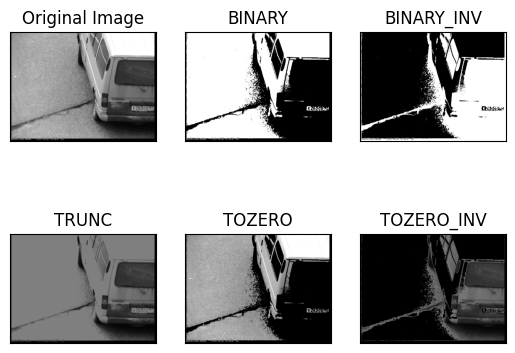

In [2]:
img = cv.imread('cars\\01-541.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

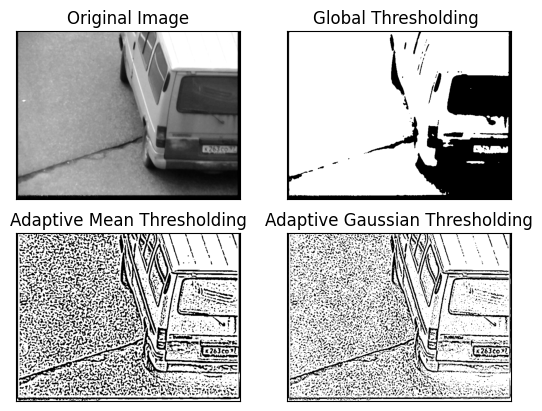

In [3]:
img = cv.imread('cars\\01-541.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,90,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding ',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [4]:
img = cv.imread('cars\\01-541.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"


# img = cv.medianBlur(img,9)



img = cv.GaussianBlur(img, (17,17), 0)


th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,15,3)

# Отображение результата
cv.imshow('Thresholded Image', th2)
cv.waitKey(0)
cv.destroyAllWindows()

### основной вариант 

In [2]:



img = cv.imread('cars\\01-2060.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

# Применение гауссовского размытия для подавления шума
# img = cv.medianBlur(img,27)
img = cv.GaussianBlur(img, (17,17), 0)

# Применение адаптивного порогового метода
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 15, 3)

# Найти контуры на изображении
contours, hierarchy = cv.findContours(th2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


img_color = cv.imread('cars\\01-2060.jpg')
assert img_color is not None, "file could not be read, check with os.path.exists()"


cv.drawContours(img_color, contours, -1, (0, 255, 0), 2)

# Отображение результата
cv.imshow('Contours', img_color)
cv.waitKey(0)
cv.destroyAllWindows()


### Вырезаем номерной знак

In [10]:
import cv2 as cv
import numpy as np


img = cv.imread('cars\\01-541.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"


img = cv.GaussianBlur(img, (17, 17), 0)

ret, thresh = cv.threshold(img,90,255,cv.THRESH_BINARY)

# thresh = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 15, 3)

# Поиск контуров
contours, _ = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


img_color = cv.imread('cars\\01-541.jpg')
assert img_color is not None, "file could not be read, check with os.path.exists()"

# Фильтрация контуров по геометрическим признакам
possible_plate_contours = []
for cnt in contours:
    # Прямоугольник 
    rect = cv.minAreaRect(cnt)
    (x, y), (w, h), angle = rect
    
    
     # Проверка на нулевую высоту или ширину
    if h == 0 or w == 0:
        continue  # Пропускаем контур, если ширина или высота равны нулю
        
        
 
    aspect_ratio = w / h if w > h else h / w
    area = w * h
    
    # Параметры для фильтрации 
    if 2.5 < aspect_ratio < 5.8 and 1500 < area < 10000:
        possible_plate_contours.append(rect)
        


for rect in possible_plate_contours:
    # Получаем параметры
    (x, y), (w, h), angle = rect
    
    # Создаем бокс для отображения контура
    box = cv.boxPoints(rect)
    box = np.int0(box)
    cv.drawContours(img_color, [box], 0, (0, 255, 0), 2)
    
    # Вырезаем и поворачиваем ROI номерного знака
    M = cv.getRotationMatrix2D((x, y), angle, 1.0)
    rotated = cv.warpAffine(img_color, M, (img_color.shape[1], img_color.shape[0]))

    # Извлекаем ROI номерного знака
    roi = rotated[int(y - h):int(y + h), int(x - w):int(x + w)]

    
    cv.imshow('License Plate ROI', roi)
    cv.waitKey(0)

    
cv.imshow('Contours', img_color)
cv.waitKey(0)
cv.destroyAllWindows()

cv.imwrite('01-541_roi.jpg', roi)

C:\Users\stoke\AppData\Local\Temp\ipykernel_15500\3733929302.py:51: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


True

## Вырезаем буквы

In [8]:


img = cv.imread('01-541_roi.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "File could not be read, check with os.path.exists()"

# Список координат для каждого символа (x, y, ширина, высота)

coordinates = [
    (67, 16, 16, 22),   
    (82, 16, 17, 22),   
    (96, 16, 15, 22),
    (110, 16, 15, 22),
    (122, 16, 15, 22),
    (135, 16, 15, 22),
    (154, 16, 12, 22),
    (164, 16, 15, 22)
    
]
output_folder = 'fix_symbols'

# Вырезаем и отображаем каждый символ по указанным координатам
for i, (x, y, w, h) in enumerate(coordinates):
    symbol = img[y:y + h, x:x + w]
    cv.imshow(f' 541_ {i}', symbol)
    symbol_path = os.path.join(output_folder, f'541_{i}.png')
    cv.imwrite(symbol_path, symbol)
    cv.waitKey(0) 

cv.destroyAllWindows()


In [12]:
img.shape[0]

576

Символ 393_0.png наиболее похож на шаблон Y.png с коэффициентом совпадения 0.61


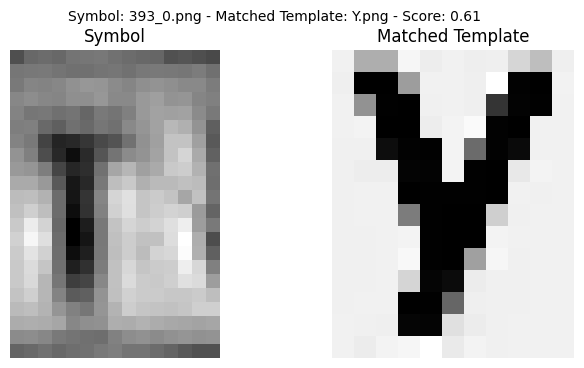

Символ 393_1.png наиболее похож на шаблон H.png с коэффициентом совпадения 0.64


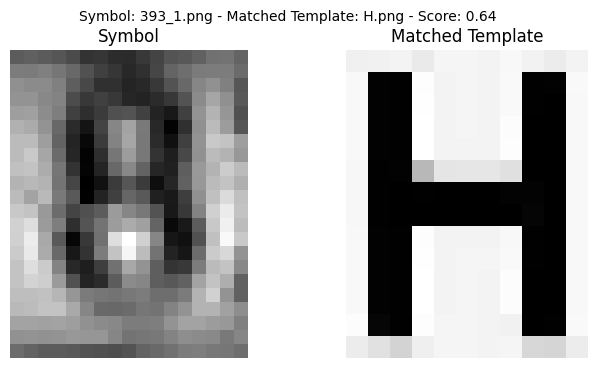

Символ 393_2.png наиболее похож на шаблон A.png с коэффициентом совпадения 0.41


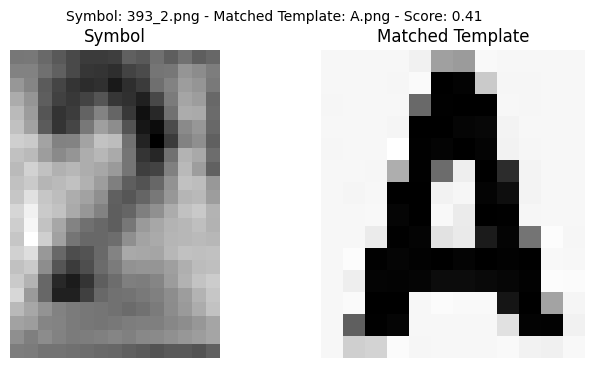

Символ 393_3.png наиболее похож на шаблон O.png с коэффициентом совпадения 0.55


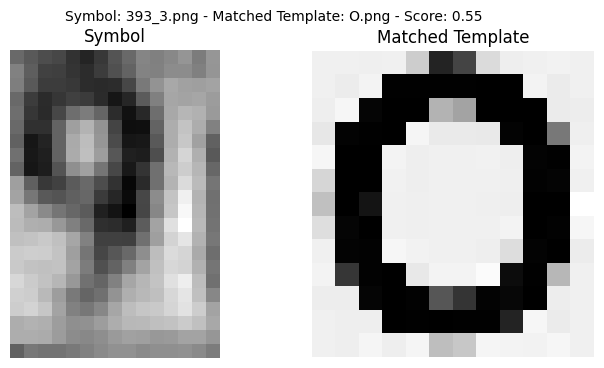

Символ 393_4.png наиболее похож на шаблон M.png с коэффициентом совпадения 0.77


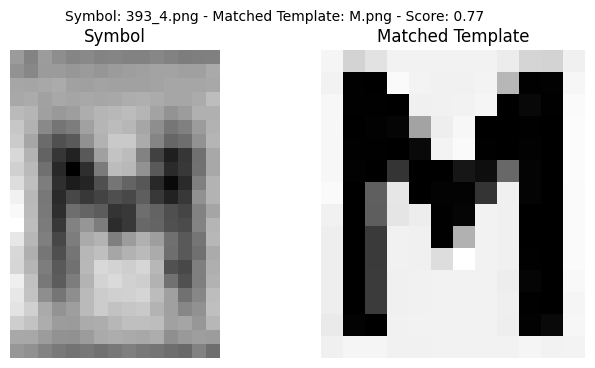

Символ 393_5.png наиболее похож на шаблон K.png с коэффициентом совпадения 0.75


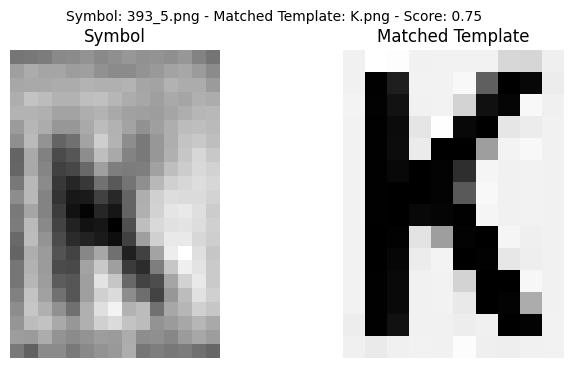

Символ 393_6.png наиболее похож на шаблон T.png с коэффициентом совпадения 0.48


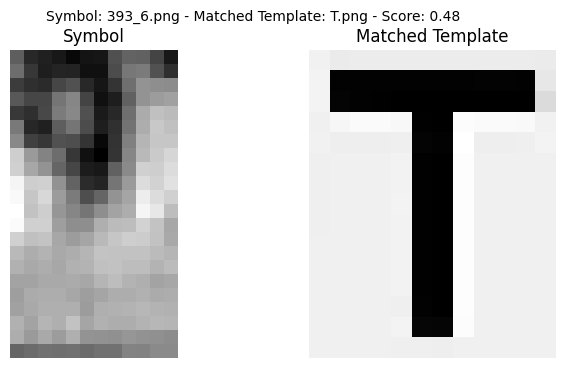

Символ 393_7.png наиболее похож на шаблон C.png с коэффициентом совпадения 0.42


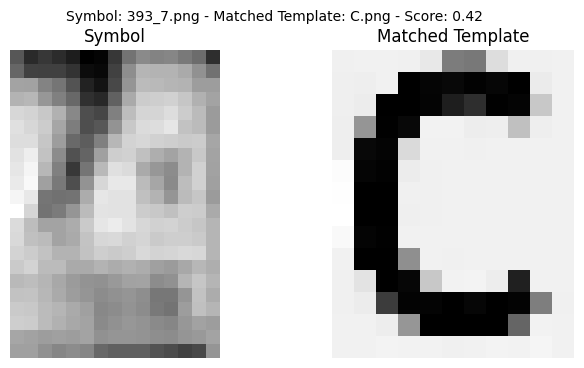

Символ 541_0.png наиболее похож на шаблон C.png с коэффициентом совпадения 0.44


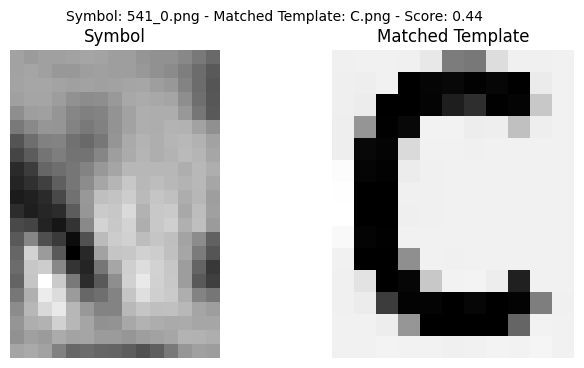

Символ 541_1.png наиболее похож на шаблон A.png с коэффициентом совпадения 0.48


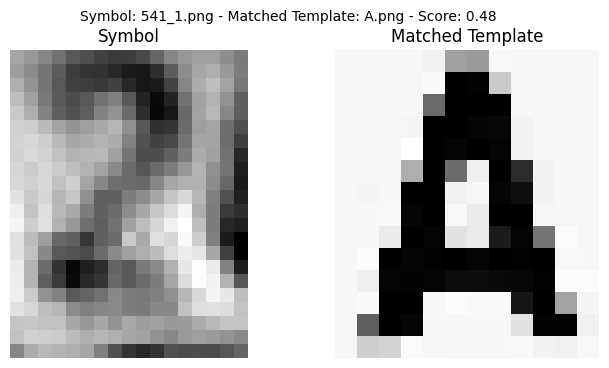

Символ 541_2.png наиболее похож на шаблон O.png с коэффициентом совпадения 0.61


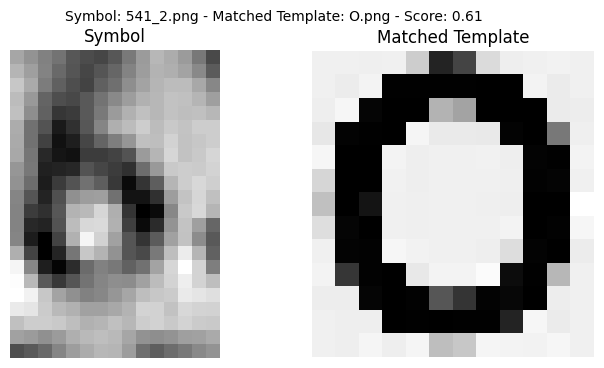

Символ 541_3.png наиболее похож на шаблон T.png с коэффициентом совпадения 0.50


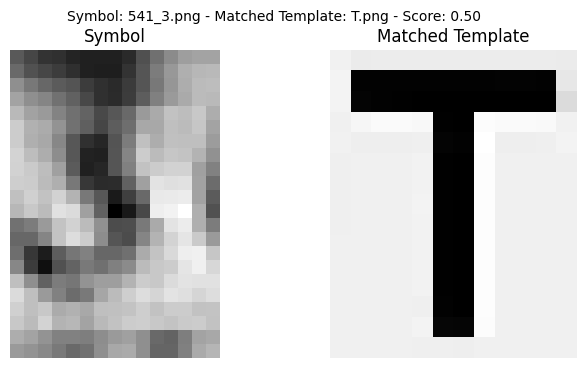

Символ 541_4.png наиболее похож на шаблон C.png с коэффициентом совпадения 0.64


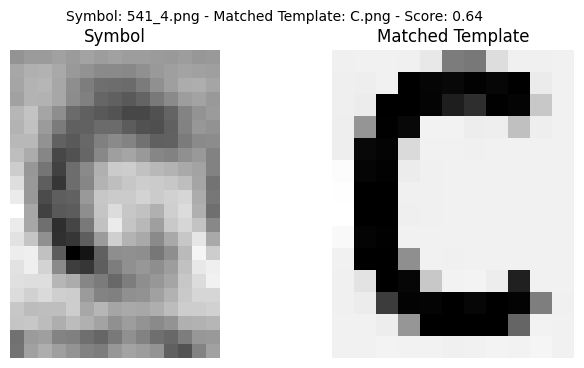

Символ 541_5.png наиболее похож на шаблон O.png с коэффициентом совпадения 0.62


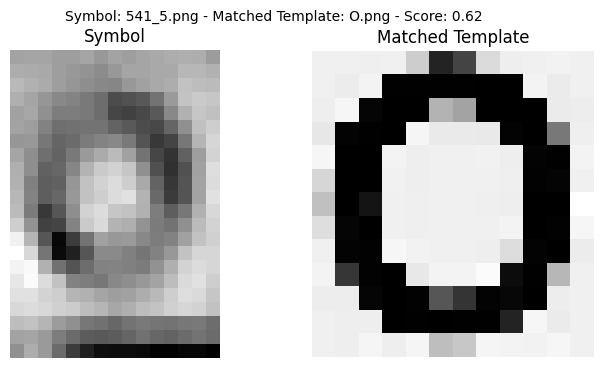

Символ 541_6.png наиболее похож на шаблон Y.png с коэффициентом совпадения 0.53


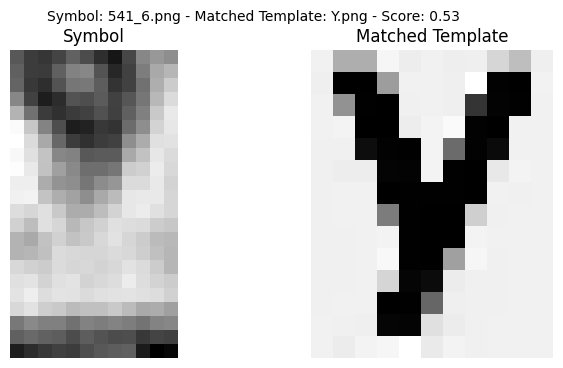

Символ 541_7.png наиболее похож на шаблон C.png с коэффициентом совпадения 0.52


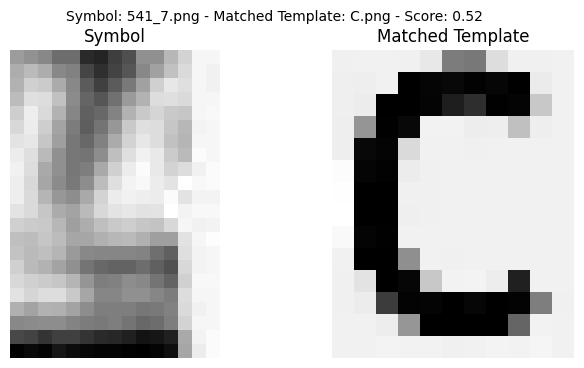

Символ 715_0.png наиболее похож на шаблон A.png с коэффициентом совпадения 0.62


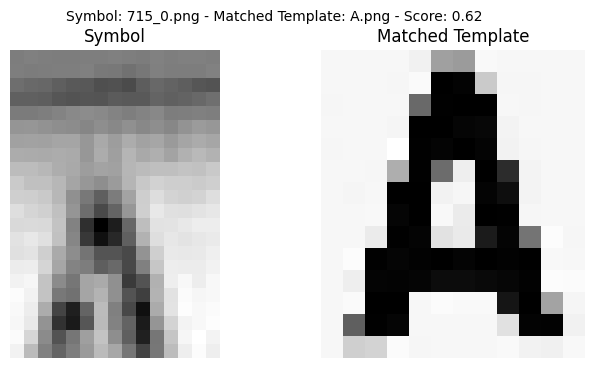

Символ 715_1.png наиболее похож на шаблон T.png с коэффициентом совпадения 0.58


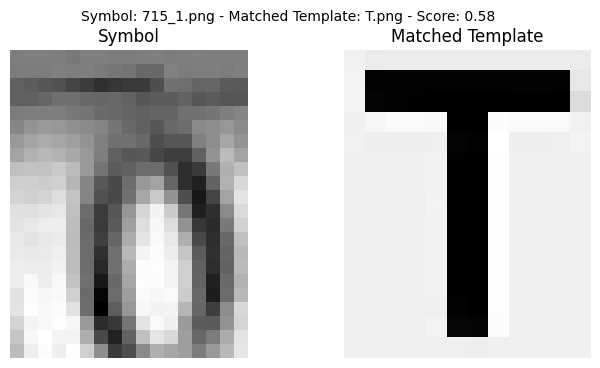

Символ 715_2.png наиболее похож на шаблон O.png с коэффициентом совпадения 0.39


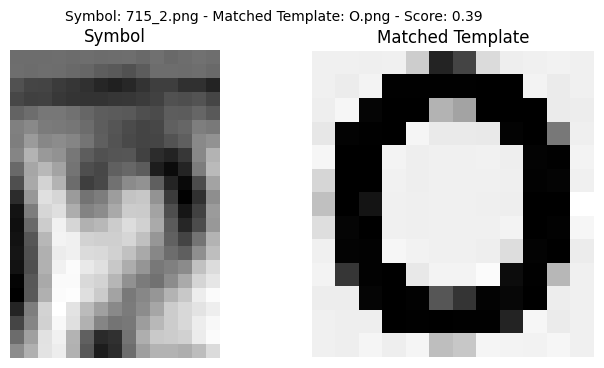

Символ 715_3.png наиболее похож на шаблон Y.png с коэффициентом совпадения 0.51


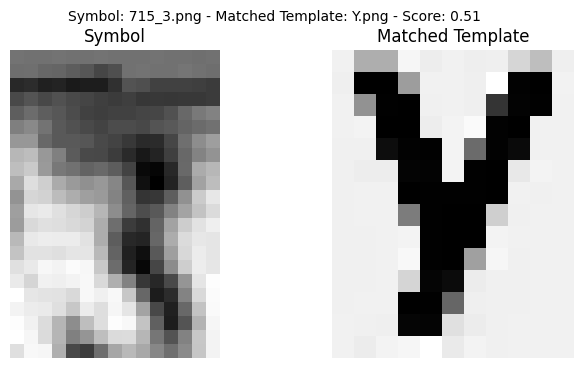

Символ 715_4.png наиболее похож на шаблон T.png с коэффициентом совпадения 0.40


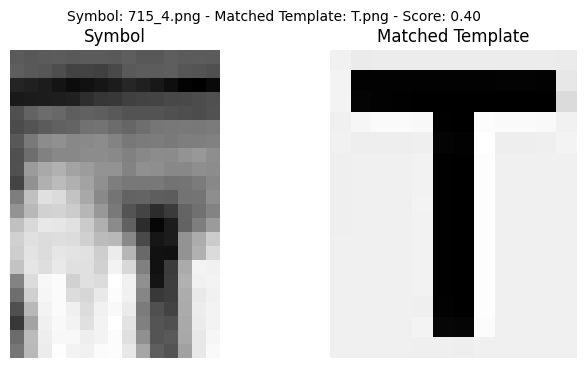

Символ 715_5.png наиболее похож на шаблон Y.png с коэффициентом совпадения 0.49


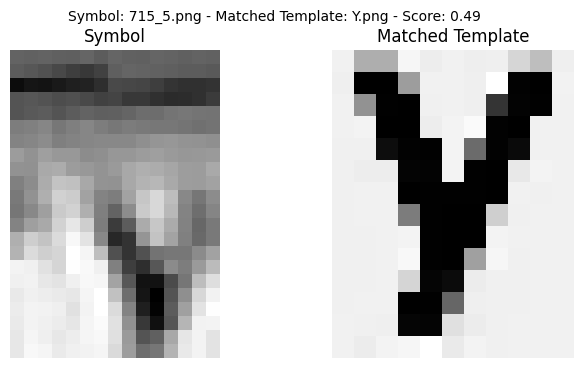

Символ 715_6.png наиболее похож на шаблон T.png с коэффициентом совпадения 0.30


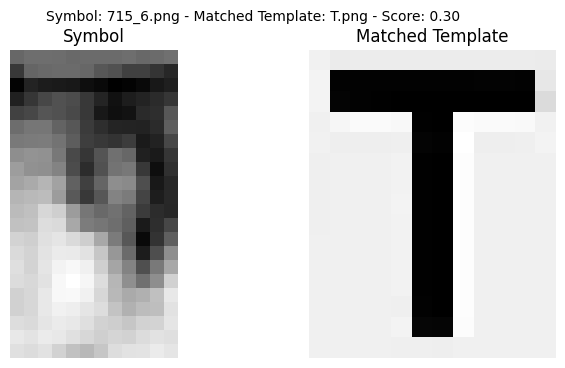

Символ 715_7.png наиболее похож на шаблон T.png с коэффициентом совпадения 0.57


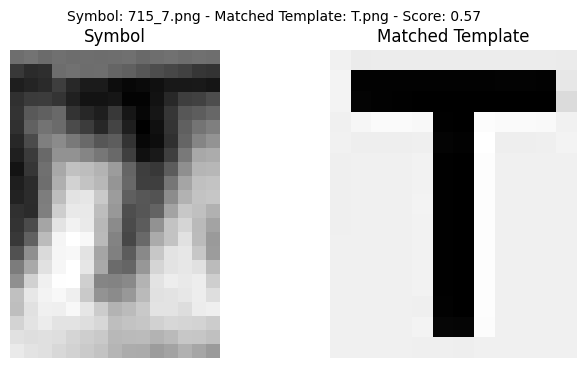

In [41]:
import cv2 as cv
import os
import matplotlib.pyplot as plt

# Пути к папкам с символами и шаблонами
symbols_folder = 'symbols'
letters_templates_folder = 'templates_letters'  # Шаблоны букв
digits_templates_folder = 'templates_digits'    # Шаблоны цифр

# Метод сопоставления
matching_method = cv.TM_CCOEFF_NORMED

# Высота символа с номера (целевое значение для масштабирования шаблонов)
target_height = 13

# Функция для сопоставления с конкретным набором шаблонов
def match_with_templates(symbol_img, templates_folder):
    best_match = None
    highest_score = -1
    matched_template = None

    for template_filename in os.listdir(templates_folder):
        template_path = os.path.join(templates_folder, template_filename)
        template_img = cv.imread(template_path, cv.IMREAD_GRAYSCALE)

        if template_img is None:
            continue

        # Масштабирование шаблона
        scale_factor_template = 0.0599078341013825 #target_height / template_img.shape[0]
        new_width_template = int(template_img.shape[1] * scale_factor_template)
        new_height_template = int(template_img.shape[0] * scale_factor_template)
        template_resized = cv.resize(template_img, (new_width_template, new_height_template))

        # Сравнение символа с шаблоном
        result = cv.matchTemplate(symbol_img, template_resized, matching_method)
        _, max_val, _, _ = cv.minMaxLoc(result)

        # Нахождение лучшего совпадения
        if max_val > highest_score:
            highest_score = max_val
            best_match = template_filename
            matched_template = template_resized

    return best_match, highest_score, matched_template

# Цикл по всем вырезанным символам
for symbol_filename in os.listdir(symbols_folder):
    symbol_path = os.path.join(symbols_folder, symbol_filename)
    symbol_img = cv.imread(symbol_path, cv.IMREAD_GRAYSCALE)

    if symbol_img is None:
        continue

#     # Проверяем, является ли символ буквой или цифрой
#     if symbol_filename[0].isalpha():  # Если первая буква имени файла - буква
#         templates_folder = letters_templates_folder
#     else:  # Если цифра
#         templates_folder = digits_templates_folder

    templates_folder = letters_templates_folder

    # Сопоставление с соответствующим набором шаблонов
    best_match, highest_score, matched_template = match_with_templates(symbol_img, templates_folder)

    # Вывод результатов
    print(f"Символ {symbol_filename} наиболее похож на шаблон {best_match} с коэффициентом совпадения {highest_score:.2f}")

    # Визуализация символа и совпавшего шаблона
    if matched_template is not None:
        fig, axes = plt.subplots(1, 2, figsize=(8, 4))
        fig.suptitle(f'Symbol: {symbol_filename} - Matched Template: {best_match} - Score: {highest_score:.2f}', fontsize=10)

        # Исходный символ
        axes[0].imshow(symbol_img, cmap='gray')
        axes[0].set_title('Symbol')
        axes[0].axis('off')

        # Совпавший шаблон
        axes[1].imshow(matched_template, cmap='gray')
        axes[1].set_title('Matched Template')
        axes[1].axis('off')

        plt.show()


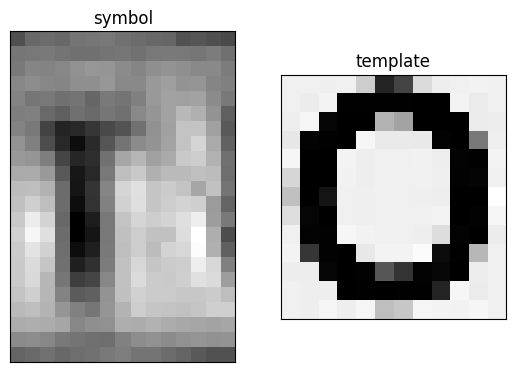

0.09820278595288329


In [4]:
symbol = cv.imread('C:\\Users\\stoke\\symbols\\393_0.png', cv.IMREAD_GRAYSCALE)

template = cv.imread('C:\\Users\\stoke\\templates_letters\\O.png', cv.IMREAD_GRAYSCALE)

target_height = 13


 # Масштабирование шаблона
scale_factor_template = 0.0599078341013825 #target_height / template_img.shape[0]
new_width_template = int(template.shape[1] * scale_factor_template)
template_resized = cv.resize(template, (new_width_template, target_height))



ret, thresh = cv.threshold(symbol, 127, 255,0)
ret, thresh2 = cv.threshold(template_resized, 127, 255,0)
contours,hierarchy = cv.findContours(thresh,2,1)
cnt1 = contours[0]
contours,hierarchy = cv.findContours(thresh2,2,1)
cnt2 = contours[0]
#######################################################
ret = cv.matchShapes(cnt1,cnt2,1,0.0)
#######################################################
plt.subplot(121),plt.imshow(symbol,cmap = 'gray')
plt.title('symbol'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(template_resized,cmap = 'gray')
plt.title('template'), plt.xticks([]), plt.yticks([])

plt.show()
print(ret)

### Сохранил старый метод сопоставления

In [ ]:
# Пути к папкам с символами и шаблонами
symbols_folder = 'symbols_reg_number'
letters_templates_folder = 'templates_letters'  # Шаблоны букв
digits_templates_folder = 'templates_digits'    # Шаблоны цифр

# Метод сопоставления
matching_method = cv.TM_CCOEFF_NORMED



# Функция для сопоставления с конкретным набором шаблонов
def match_with_templates(symbol_img, templates_folder):
    best_match = None
    highest_score = -1
    matched_template = None

    for template_filename in os.listdir(templates_folder):
        template_path = os.path.join(templates_folder, template_filename)
        template_img = cv.imread(template_path)  #добавить GRAYSCALE ? 

        if template_img is None:
            continue

        # Масштабирование шаблона
        scale_factor_template = 0.0488505747126437 
        new_width_template = int(template_img.shape[1] * scale_factor_template)
        new_height_template = int(template_img.shape[0] * scale_factor_template)
        template_resized = cv.resize(template_img, (new_width_template, new_height_template))

        # Сравнение символа с шаблоном
        result = cv.matchTemplate(symbol_img, template_resized, matching_method)
        _, max_val, _, _ = cv.minMaxLoc(result)

        # Нахождение лучшего совпадения
        if max_val > highest_score:
            highest_score = max_val
            best_match = template_filename
            matched_template = template_resized

    return best_match, highest_score, matched_template

# Цикл по всем вырезанным символам
for symbol_filename in os.listdir(symbols_folder):
    symbol_path = os.path.join(symbols_folder, symbol_filename)
    symbol_img = cv.imread(symbol_path)  #добавить GRAYSCALE ? 

    if symbol_img is None:
        continue       
        
    templates_folder = digits_templates_folder

    # Сопоставление с соответствующим набором шаблонов
    best_match, highest_score, matched_template = match_with_templates(symbol_img, templates_folder)

    # Вывод результатов
    print(f"Символ {symbol_filename} наиболее похож на шаблон {best_match} с коэффициентом совпадения {highest_score:.2f}")

    # Визуализация символа и совпавшего шаблона
    if matched_template is not None:
        fig, axes = plt.subplots(1, 2, figsize=(8, 4))
        fig.suptitle(f'Symbol: {symbol_filename} - Matched Template: {best_match} - Score: {highest_score:.2f}', fontsize=10)

        # Исходный символ
        axes[0].imshow(symbol_img, cmap='gray')
        axes[0].set_title('Symbol')
        axes[0].axis('off')

        # Совпавший шаблон
        axes[1].imshow(matched_template, cmap='gray')
        axes[1].set_title('Matched Template')
        axes[1].axis('off')

        plt.show()